In [344]:
 #import required libraries
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [345]:
#import the data
df=pd.read_csv('temperature_device_failure.csv')

In [346]:
#display the data
df.head()

,timestamp,value
0,7/4/2013 0:00,69.880835
1,7/4/2013 1:00,71.220227
2,7/4/2013 2:00,70.877805
3,7/4/2013 3:00,68.959400
4,7/4/2013 4:00,69.283551


In [347]:
#check for null values
df.isnull().sum()

timestamp    0
value        0
dtype: int64

In [348]:
#check for datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  7267 non-null   object 
 1   value      7267 non-null   float64
dtypes: float64(1), object(1)
memory usage: 113.7+ KB


In [349]:
#convert timestamp from object datatype to datetime
df['timestamp']=pd.to_datetime(df['timestamp'])
df.head()

,timestamp,value
0,2013-07-04 00:00:00,69.880835
1,2013-07-04 01:00:00,71.220227
2,2013-07-04 02:00:00,70.877805
3,2013-07-04 03:00:00,68.959400
4,2013-07-04 04:00:00,69.283551


## 1) Plot / visualize the 'original' dataset

Text(0.5, 1.0, 'Time_Stamp vs Temperature')

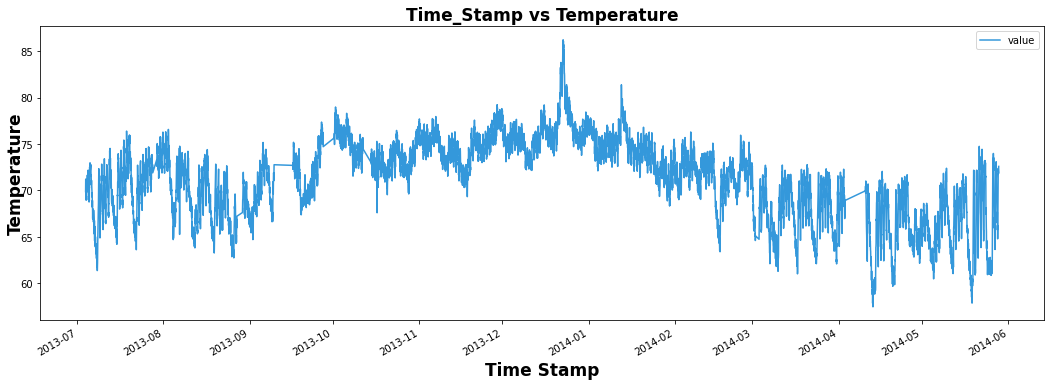

In [350]:
df.plot(x='timestamp',y='value',figsize=(18,6),color='#3498db')
plt.ylabel('Temperature',fontweight="bold",fontsize='17', verticalalignment='center')
plt.xlabel('Time Stamp',fontweight="bold",fontsize='17', horizontalalignment='center')
plt.title('Time_Stamp vs Temperature',fontweight="bold",fontsize='17', horizontalalignment='center')

## 2) Perform Feature Engineering

In [351]:
#extract time and day of the week from the timestamp
df['Hours']=df['timestamp'].dt.hour
df['Day of Week']=df['timestamp'].dt.dayofweek

In [352]:
df

,timestamp,value,Hours,Day of Week
0,2013-07-04 00:00:00,69.880835,0,3
1,2013-07-04 01:00:00,71.220227,1,3
2,2013-07-04 02:00:00,70.877805,2,3
3,2013-07-04 03:00:00,68.959400,3,3
4,2013-07-04 04:00:00,69.283551,4,3
...,...,...,...,...
7262,2014-05-28 11:00:00,72.370206,11,2
7263,2014-05-28 12:00:00,72.172956,12,2
7264,2014-05-28 13:00:00,72.046565,13,2
7265,2014-05-28 14:00:00,71.825226,14,2


In [353]:
#apply conditions for 4 categories namely 'Weekday Day','Weekday Night','Weekend Day','Weekend Night'.
conditions = [
    ((df['Day of Week'] <=4) &(df['Hours']>=7) & (df['Hours']<=19)),
    ((df['Day of Week'] <=4) &(df['Hours']<=6) | (df['Hours']>=20)),
    ((df['Day of Week'] >=5) &(df['Hours']>=7) & (df['Hours']<=19)),
    ((df['Day of Week'] >=5) &(df['Hours']<=6) | (df['Hours']>=20))
    ]

In [354]:
values = ['Weekday Day','Weekday Night','Weekend Day','Weekend Night']

In [355]:
#create a new column named 'dtcat' with 4 categories by applying the conditions 
df['dtcat'] = np.select(conditions, values)

In [356]:
#displaying the updated dataset
df.head()

,timestamp,value,Hours,Day of Week,dtcat
0,2013-07-04 00:00:00,69.880835,0,3,Weekday Night
1,2013-07-04 01:00:00,71.220227,1,3,Weekday Night
2,2013-07-04 02:00:00,70.877805,2,3,Weekday Night
3,2013-07-04 03:00:00,68.959400,3,3,Weekday Night
4,2013-07-04 04:00:00,69.283551,4,3,Weekday Night


In [357]:
#Displaying the count of values for the column 'dtcat'
df['dtcat'].value_counts()

Weekday Day      2843
Weekday Night    2736
Weekend Day      1092
Weekend Night     596
Name: dtcat, dtype: int64

In [358]:
#applying the standard scalar method 
scalar=StandardScaler()
df1=df.copy()
df1[['value','Hours','Day of Week']]=scalar.fit_transform(df1[['value','Hours','Day of Week']])
df1.head()

,timestamp,value,Hours,Day of Week,dtcat
0,2013-07-04 00:00:00,-0.320586,-1.661537,0.005769,Weekday Night
1,2013-07-04 01:00:00,-0.005228,-1.517172,0.005769,Weekday Night
2,2013-07-04 02:00:00,-0.085851,-1.372807,0.005769,Weekday Night
3,2013-07-04 03:00:00,-0.537536,-1.228442,0.005769,Weekday Night
4,2013-07-04 04:00:00,-0.461215,-1.084077,0.005769,Weekday Night


## 3) Apply the K-Means algorithm

In [359]:
#apply K-Means algorithm 
variances=[]
for i in range(1,21):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(df1[['value','Hours','Day of Week']])
    variances.append(kmeans.inertia_)

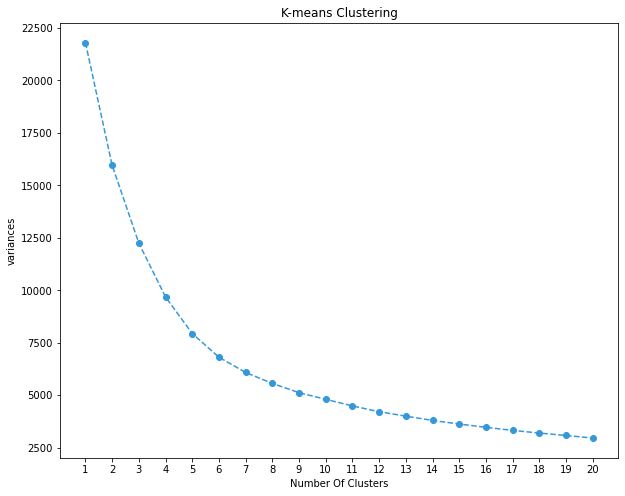

In [360]:
#plotting the K-means clusting and predicting the best K-means using the ELBOW method
plt.figure(figsize=(10,8))
plt.plot(range(1,21),variances,marker='o',linestyle='--',color='#3498db')
plt.xlabel('Number Of Clusters')
plt.xticks(range(1,21))
plt.ylabel('variances')
plt.title('K-means Clustering')
plt.show()

In [361]:
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=42)
kmeans.fit(df[['value','Hours','Day of Week']])

KMeans(n_clusters=5, random_state=42)

## 4) Apply PCA

In [362]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(df1[['value','Hours','Day of Week']])
df1[['pca1','pca2']]=pca.fit_transform(df1[['value','Hours','Day of Week']])
df1.head()

,timestamp,value,Hours,Day of Week,dtcat,pca1,pca2
0,2013-07-04 00:00:00,-0.320586,-1.661537,0.005769,Weekday Night,1.166074,-1.000671
1,2013-07-04 01:00:00,-0.005228,-1.517172,0.005769,Weekday Night,0.864782,-0.908383
2,2013-07-04 02:00:00,-0.085851,-1.372807,0.005769,Weekday Night,0.839223,-0.822903
3,2013-07-04 03:00:00,-0.537536,-1.228442,0.005769,Weekday Night,1.072048,-0.743804
4,2013-07-04 04:00:00,-0.461215,-1.084077,0.005769,Weekday Night,0.937205,-0.655625


In [363]:
#predict the cluster by using the best K-means value
km=KMeans(n_clusters=5)
km.fit(df1[['pca1','pca2']])
df1['cluster']=km.predict(df1[['pca1','pca2']])
df1.head()

,timestamp,value,Hours,Day of Week,dtcat,pca1,pca2,cluster
0,2013-07-04 00:00:00,-0.320586,-1.661537,0.005769,Weekday Night,1.166074,-1.000671,3
1,2013-07-04 01:00:00,-0.005228,-1.517172,0.005769,Weekday Night,0.864782,-0.908383,3
2,2013-07-04 02:00:00,-0.085851,-1.372807,0.005769,Weekday Night,0.839223,-0.822903,3
3,2013-07-04 03:00:00,-0.537536,-1.228442,0.005769,Weekday Night,1.072048,-0.743804,3
4,2013-07-04 04:00:00,-0.461215,-1.084077,0.005769,Weekday Night,0.937205,-0.655625,3


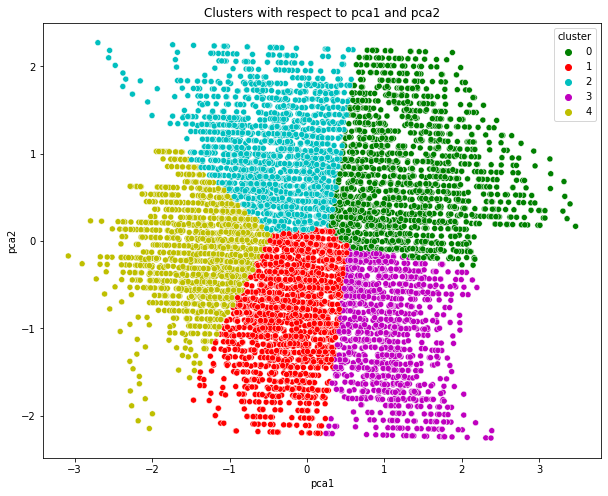

In [364]:
#plot the cluster with respect to pca1 and pca2
fig=plt.figure(figsize=(10,8))
sns.scatterplot(data=df1,x='pca1',y='pca2',hue='cluster',palette=['g','r','c','m','y'])
plt.xlabel('pca1')
plt.ylabel('pca2')
plt.title('Clusters with respect to pca1 and pca2')
plt.show()

## outliers_fraction

In [365]:
outliers_fraction1=0.01
#using 1.5*IQR rule calculate outliers_fraction2
#calculate Q1 and Q2
Q1=df['value'].quantile(0.25)
Q3=df['value'].quantile(0.75)
IQR=Q3-Q1
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
number_of_outliers=df[(df['value']<(lower_limit)) | (df['value']>(upper_limit))].shape[0]
outliers_fraction2=round((number_of_outliers/df.shape[0]),3)

In [366]:
#displaying the number of outliers
print(f"Number of Outliers with outlier fraction {outliers_fraction2} is : {number_of_outliers}")

Number of Outliers with outlier fraction 0.005 is : 35


## 5) Gaussian distribution (EllipticEnvelope)

### Gaussian distribution (EllipticEnvelope) with outlier Fraction = 0.01

In [367]:
from sklearn.covariance import EllipticEnvelope

In [368]:
#splitting the original dataset into 4 different categories 
Weekday_Day=df[df['dtcat']=='Weekday Day'].copy()
Weekday_Night=df[df['dtcat']=='Weekday Night'].copy()
Weekend_Day=df[df['dtcat']=='Weekend Day'].copy()
Weekend_Night=df[df['dtcat']=='Weekend Night'].copy()

In [369]:
#creating a new column named anomaly in every category fit and predicting the dataset 
Weekday_Day['Anomaly']= EllipticEnvelope(contamination=outliers_fraction1).fit_predict(Weekday_Day[['value']])
Weekday_Night['Anomaly']= EllipticEnvelope(contamination=outliers_fraction1).fit_predict(Weekday_Night[['value']])
Weekend_Day['Anomaly']= EllipticEnvelope(contamination=outliers_fraction1).fit_predict(Weekend_Day[['value']])
Weekend_Night['Anomaly']= EllipticEnvelope(contamination=outliers_fraction1).fit_predict(Weekend_Night[['value']])

In [370]:
#finding the number of outliers in each category
GF1_Anomaly1=len(Weekday_Day[Weekday_Day['Anomaly'].map(lambda x : x ==-1)])
GF1_Anomaly2=len(Weekday_Night[Weekday_Night['Anomaly'].map(lambda x : x ==-1)])
GF1_Anomaly3=len(Weekend_Day[Weekend_Day['Anomaly'].map(lambda x : x ==-1)])
GF1_Anomaly4=len(Weekend_Night[Weekend_Night['Anomaly'].map(lambda x : x ==-1)])

In [371]:
#Displaying the number of anomalies in each category
print(f'The Number of Anomaly in Weekday_Day for Gaussian distribution with outlier fraction is : {GF1_Anomaly1} ')
print(f'The Number of Anomaly in Weekday_Night for Gaussian distribution with outlier fraction is : {GF1_Anomaly2} ')
print(f'The Number of Anomaly in Weekend_Day for Gaussian distribution with outlier fraction is : {GF1_Anomaly3} ')
print(f'The Number of Anomaly in Weekend_Night for Gaussian distribution with outlier fraction is : {GF1_Anomaly4} ')

The Number of Anomaly in Weekday_Day for Gaussian distribution with outlier fraction is : 29 
The Number of Anomaly in Weekday_Night for Gaussian distribution with outlier fraction is : 28 
The Number of Anomaly in Weekend_Day for Gaussian distribution with outlier fraction is : 11 
The Number of Anomaly in Weekend_Night for Gaussian distribution with outlier fraction is : 6 


In [372]:
#concatenating the 4 datsets into single dataset
GF1=pd.concat([Weekday_Day,Weekday_Night,Weekend_Day,Weekend_Night],axis=0)

In [373]:
# Displaying the lsit of anamolies found using Guassian Distribution and outlier frction 1
anomaly=GF1.loc[GF1['Anomaly']==-1]
anomaly

,timestamp,value,Hours,Day of Week,dtcat,Anomaly
103,2013-07-08 07:00:00,62.200489,7,0,Weekday Day,-1
3732,2013-12-23 07:00:00,82.627288,7,0,Weekday Day,-1
3733,2013-12-23 08:00:00,82.622298,8,0,Weekday Day,-1
3734,2013-12-23 09:00:00,82.373437,9,0,Weekday Day,-1
5479,2014-03-07 07:00:00,62.103566,7,4,Weekday Day,-1
...,...,...,...,...,...,...
3703,2013-12-22 02:00:00,83.008634,2,6,Weekend Night,-1
6174,2014-04-13 03:00:00,58.862275,3,6,Weekend Night,-1
6175,2014-04-13 04:00:00,58.777141,4,6,Weekend Night,-1
6176,2014-04-13 05:00:00,59.410747,5,6,Weekend Night,-1


<AxesSubplot:xlabel='value', ylabel='Count'>

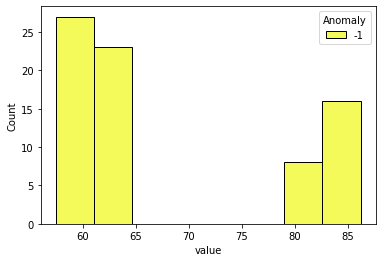

In [374]:
#Displaying the histogram values includes anomalies  
sns.set_palette("Paired")
sns.histplot(anomaly, x="value",hue="Anomaly", multiple="stack",palette='plasma_r')

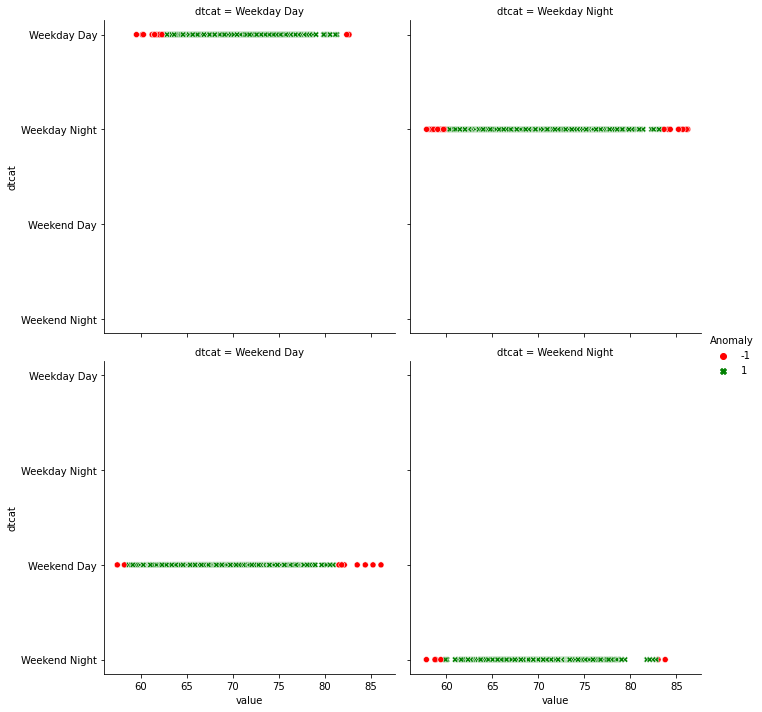

In [375]:
#Displaying the 4 categories using scatter plot including the anomalies  
sns.relplot(data=GF1,x='value',y='dtcat',hue="Anomaly",col="dtcat",col_wrap=2,style="Anomaly",kind="scatter",palette=['Red','Green'])

<AxesSubplot:xlabel='value', ylabel='Count'>

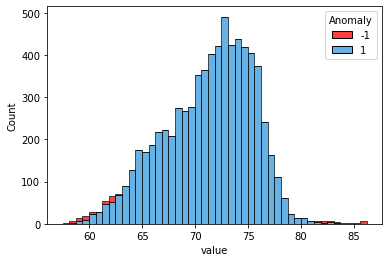

In [376]:
#plotting the histogram with the concatinated dataset
sns.set_palette("Paired")
sns.histplot(GF1, x="value",hue="Anomaly", multiple="stack",palette=['Red','#3498db'])

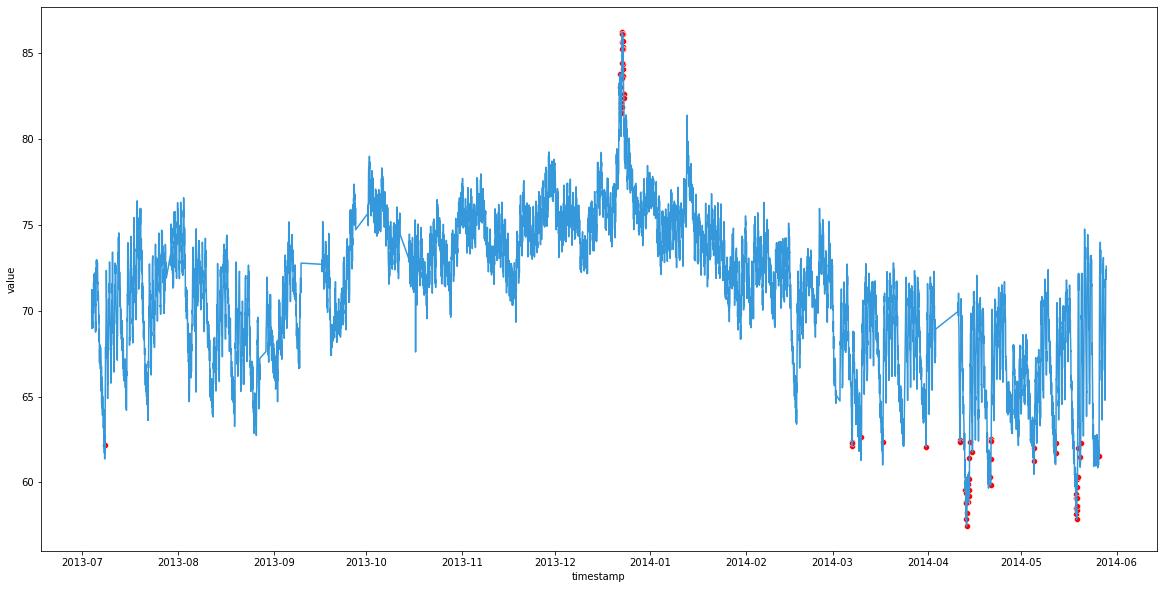

In [377]:
#Plotting the timeseries graph along with the anamolies 
fig=plt.figure(figsize=(20,10))
sns.lineplot(data=GF1,x='timestamp',y='value',color='#3498db')
sns.scatterplot(data=GF1[GF1['Anomaly']==-1],x='timestamp',y='value',color='red')
plt.show()

### Gaussian distribution (EllipticEnvelope) with outlier Fraction = 0.005

In [378]:
#splitting the original dataset into 4 different categories 
Weekday_Day=df[df['dtcat']=='Weekday Day'].copy()
Weekday_Night=df[df['dtcat']=='Weekday Night'].copy()
Weekend_Day=df[df['dtcat']=='Weekend Day'].copy()
Weekend_Night=df[df['dtcat']=='Weekend Night'].copy()

In [379]:
#creating a new column named anomaly in every category fit and predicting the dataset 
Weekday_Day['Anomaly']= EllipticEnvelope(contamination=outliers_fraction2).fit_predict(Weekday_Day[['value']])
Weekday_Night['Anomaly']= EllipticEnvelope(contamination=outliers_fraction2).fit_predict(Weekday_Night[['value']])
Weekend_Day['Anomaly']= EllipticEnvelope(contamination=outliers_fraction2).fit_predict(Weekend_Day[['value']])
Weekend_Night['Anomaly']= EllipticEnvelope(contamination=outliers_fraction2).fit_predict(Weekend_Night[['value']])

In [380]:
#finding the number of outliers in each category
GF2_Anomaly1=len(Weekday_Day[Weekday_Day['Anomaly'].map(lambda x : x ==-1)])
GF2_Anomaly2=len(Weekday_Night[Weekday_Night['Anomaly'].map(lambda x : x ==-1)])
GF2_Anomaly3=len(Weekend_Day[Weekend_Day['Anomaly'].map(lambda x : x ==-1)])
GF2_Anomaly4=len(Weekend_Night[Weekend_Night['Anomaly'].map(lambda x : x ==-1)])

In [381]:
#Displaying the number of anomalies in each category
print(f'The Number of Anomaly in Weekday_Day for Gaussian distribution with outlier fraction is : {GF2_Anomaly1} ')
print(f'The Number of Anomaly in Weekday_Night for Gaussian distribution with outlier fraction is : {GF2_Anomaly2} ')
print(f'The Number of Anomaly in Weekend_Day for Gaussian distribution with outlier fraction is : {GF2_Anomaly3} ')
print(f'The Number of Anomaly in Weekend_Night for Gaussian distribution with outlier fraction is : {GF2_Anomaly4} ')

The Number of Anomaly in Weekday_Day for Gaussian distribution with outlier fraction is : 15 
The Number of Anomaly in Weekday_Night for Gaussian distribution with outlier fraction is : 14 
The Number of Anomaly in Weekend_Day for Gaussian distribution with outlier fraction is : 6 
The Number of Anomaly in Weekend_Night for Gaussian distribution with outlier fraction is : 3 


In [382]:
#concatenating the 4 datsets into single dataset
GF2=pd.concat([Weekday_Day,Weekday_Night,Weekend_Day,Weekend_Night],axis=0)

In [383]:
# Displaying the lsit of anamolies found using Guassian Distribution and outlier frction 1
anomaly=GF2.loc[GF2['Anomaly']==-1]
anomaly

,timestamp,value,Hours,Day of Week,dtcat,Anomaly
3732,2013-12-23 07:00:00,82.627288,7,0,Weekday Day,-1
5479,2014-03-07 07:00:00,62.103566,7,4,Weekday Day,-1
6039,2014-03-31 07:00:00,62.083133,7,0,Weekday Day,-1
6202,2014-04-14 07:00:00,59.536298,7,0,Weekday Day,-1
6203,2014-04-14 08:00:00,61.427603,8,0,Weekday Day,-1
6226,2014-04-15 07:00:00,61.773490,7,1,Weekday Day,-1
6370,2014-04-21 07:00:00,61.356241,7,0,Weekday Day,-1
6706,2014-05-05 07:00:00,62.019102,7,0,Weekday Day,-1
6707,2014-05-05 08:00:00,61.236081,8,0,Weekday Day,-1
6875,2014-05-12 08:00:00,61.740429,8,0,Weekday Day,-1


<AxesSubplot:xlabel='value', ylabel='Count'>

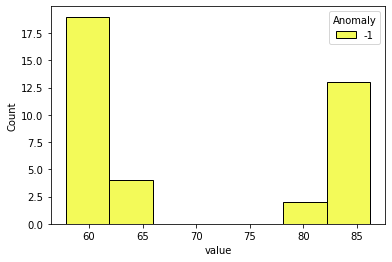

In [384]:
#Displaying the histogram values includes anomalies
sns.set_palette("Paired")
sns.histplot(anomaly, x="value",hue="Anomaly", multiple="stack",palette='plasma_r')

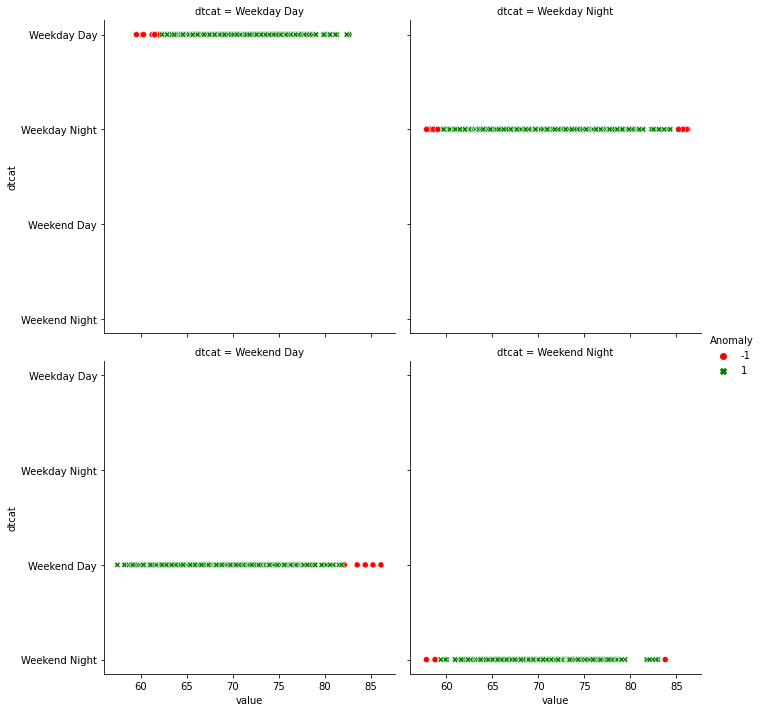

In [385]:
#Displaying the 4 categories using scatter plot including the anomalies
sns.relplot(data=GF2,x='value',y='dtcat',hue="Anomaly",col="dtcat",col_wrap=2,style="Anomaly",kind="scatter",palette=['Red','Green'])

<AxesSubplot:xlabel='value', ylabel='Count'>

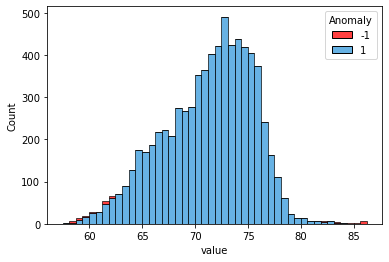

In [386]:
#plotting the histogram with the concatinated dataset
sns.set_palette("Paired")
sns.histplot(GF2, x="value",hue="Anomaly", multiple="stack",palette=['Red','#3498db'])

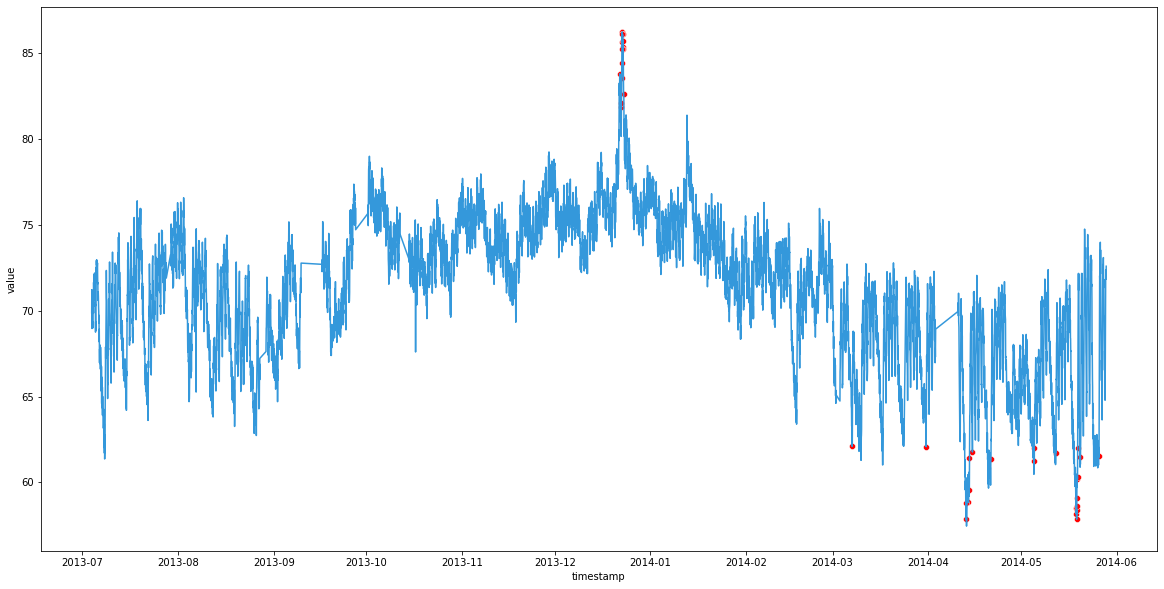

In [387]:
#Plotting the timeseries graph along with the anamolies 
fig=plt.figure(figsize=(20,10))
sns.lineplot(data=GF2,x='timestamp',y='value',color='#3498db')
sns.scatterplot(data=GF2[GF2['Anomaly']==-1],x='timestamp',y='value',color='red')
plt.show()

## Isolation Forest algorithm

### Isolation Forest algorithm with outlier Fraction = 0.01

In [388]:
 from sklearn.ensemble import IsolationForest

In [389]:
#splitting the original dataset into 4 different categories 
Weekday_Day=df[df['dtcat']=='Weekday Day'].copy()
Weekday_Night=df[df['dtcat']=='Weekday Night'].copy()
Weekend_Day=df[df['dtcat']=='Weekend Day'].copy()
Weekend_Night=df[df['dtcat']=='Weekend Night'].copy()

In [390]:
#creating a new column named anomaly in every category fit and predicting the dataset 
Weekday_Day['Anomaly']= IsolationForest(contamination=outliers_fraction1).fit_predict(Weekday_Day[['value']])
Weekday_Night['Anomaly']= IsolationForest(contamination=outliers_fraction1).fit_predict(Weekday_Night[['value']])
Weekend_Day['Anomaly']= IsolationForest(contamination=outliers_fraction1).fit_predict(Weekend_Day[['value']])
Weekend_Night['Anomaly']= IsolationForest(contamination=outliers_fraction1).fit_predict(Weekend_Night[['value']])

In [391]:
#finding the number of outliers in each category
IF1_Anomaly1=len(Weekday_Day[Weekday_Day['Anomaly'].map(lambda x : x ==-1)])
IF1_Anomaly2=len(Weekday_Night[Weekday_Night['Anomaly'].map(lambda x : x ==-1)])
IF1_Anomaly3=len(Weekend_Day[Weekend_Day['Anomaly'].map(lambda x : x ==-1)])
IF1_Anomaly4=len(Weekend_Night[Weekend_Night['Anomaly'].map(lambda x : x ==-1)])

In [392]:
#Displaying the number of anomalies in each category
print(f'The Number of Anomaly in Weekday_Day for Gaussian distribution with outlier fraction is : {IF1_Anomaly1} ')
print(f'The Number of Anomaly in Weekday_Night for Gaussian distribution with outlier fraction is : {IF1_Anomaly2} ')
print(f'The Number of Anomaly in Weekend_Day for Gaussian distribution with outlier fraction is : {IF1_Anomaly3} ')
print(f'The Number of Anomaly in Weekend_Night for Gaussian distribution with outlier fraction is : {IF1_Anomaly4} ')

The Number of Anomaly in Weekday_Day for Gaussian distribution with outlier fraction is : 28 
The Number of Anomaly in Weekday_Night for Gaussian distribution with outlier fraction is : 28 
The Number of Anomaly in Weekend_Day for Gaussian distribution with outlier fraction is : 11 
The Number of Anomaly in Weekend_Night for Gaussian distribution with outlier fraction is : 6 


In [393]:
#concatenating the 4 datsets into single dataset
IF1=pd.concat([Weekday_Day,Weekday_Night,Weekend_Day,Weekend_Night],axis=0)

In [394]:
# Displaying the lsit of anamolies found using outlier fraction 2
anomaly=IF1.loc[IF1['Anomaly']==-1]
anomaly

,timestamp,value,Hours,Day of Week,dtcat,Anomaly
103,2013-07-08 07:00:00,62.200489,7,0,Weekday Day,-1
3732,2013-12-23 07:00:00,82.627288,7,0,Weekday Day,-1
3733,2013-12-23 08:00:00,82.622298,8,0,Weekday Day,-1
3734,2013-12-23 09:00:00,82.373437,9,0,Weekday Day,-1
3735,2013-12-23 10:00:00,81.323119,10,0,Weekday Day,-1
...,...,...,...,...,...,...
3703,2013-12-22 02:00:00,83.008634,2,6,Weekend Night,-1
3704,2013-12-22 03:00:00,82.815627,3,6,Weekend Night,-1
3706,2013-12-22 05:00:00,82.454278,5,6,Weekend Night,-1
3707,2013-12-22 06:00:00,82.091901,6,6,Weekend Night,-1


<AxesSubplot:xlabel='value', ylabel='Count'>

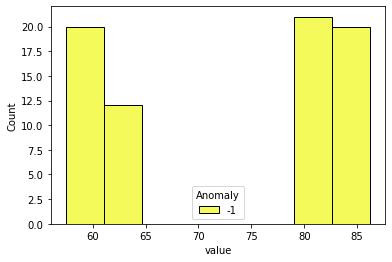

In [395]:
#Displaying the histogram values includes anomalies
sns.set_palette("Paired")
sns.histplot(anomaly, x="value",hue="Anomaly", multiple="stack",palette='plasma_r')

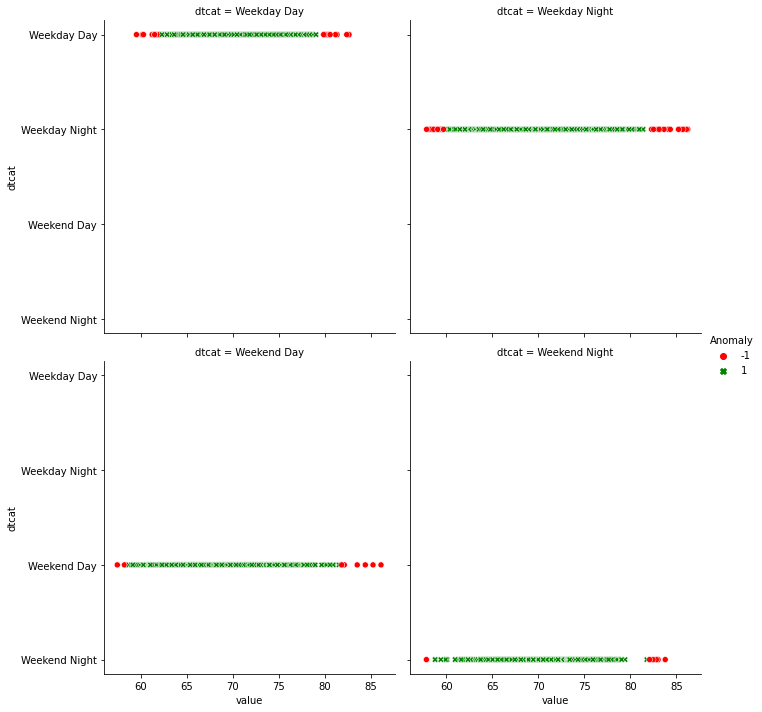

In [396]:
#Displaying the 4 categories using scatter plot including the anomalies
sns.relplot(data=IF1,x='value',y='dtcat',hue="Anomaly",col="dtcat",col_wrap=2,style="Anomaly",kind="scatter",palette=['Red','Green'])

<AxesSubplot:xlabel='value', ylabel='Count'>

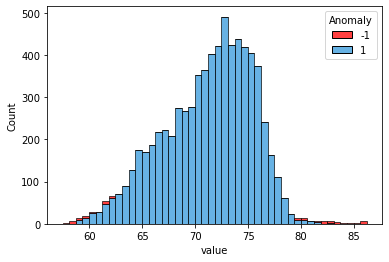

In [397]:
#plotting the histogram with the concatinated dataset
sns.set_palette("Paired")
sns.histplot(IF1, x="value",hue="Anomaly", multiple="stack",palette=['Red','#3498db'])

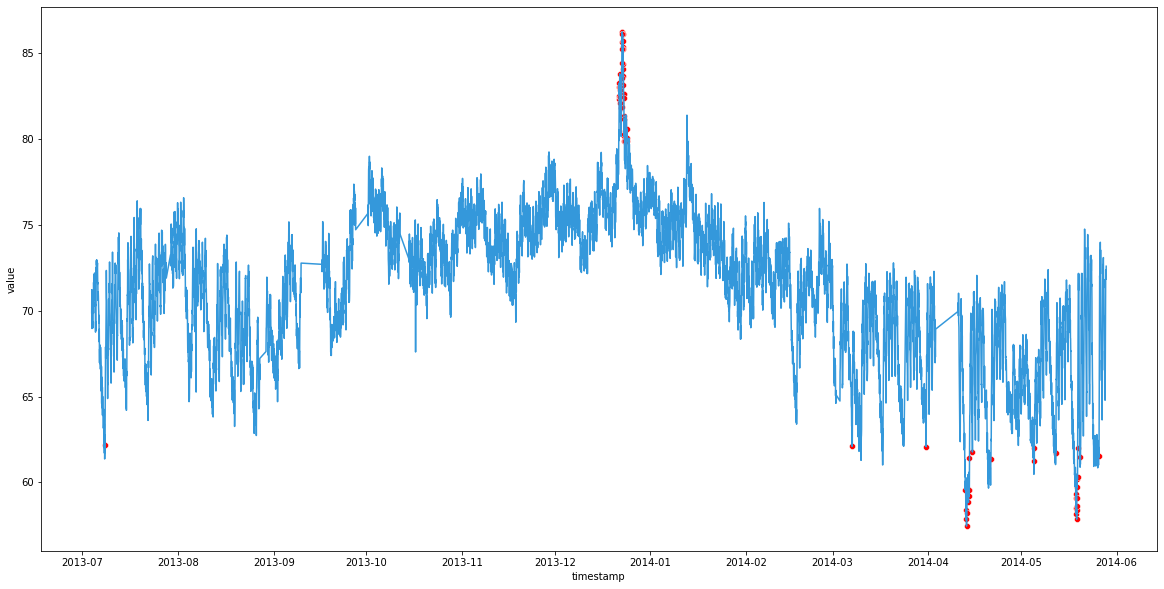

In [398]:
#Plotting the timeseries graph along with the anamolies 
fig=plt.figure(figsize=(20,10))
sns.lineplot(data=IF1,x='timestamp',y='value',color='#3498db')
sns.scatterplot(data=IF1[IF1['Anomaly']==-1],x='timestamp',y='value',color='red')
plt.show()

### Isolation Forest algorithm with outlier Fraction = 0.005

In [399]:
#splitting the original dataset into 4 different categories 
Weekday_Day=df[df['dtcat']=='Weekday Day'].copy()
Weekday_Night=df[df['dtcat']=='Weekday Night'].copy()
Weekend_Day=df[df['dtcat']=='Weekend Day'].copy()
Weekend_Night=df[df['dtcat']=='Weekend Night'].copy()

In [400]:
#creating a new column named anomaly in every category fit and predicting the dataset 
Weekday_Day['Anomaly']= IsolationForest(contamination=outliers_fraction2).fit_predict(Weekday_Day[['value']])
Weekday_Night['Anomaly']= IsolationForest(contamination=outliers_fraction2).fit_predict(Weekday_Night[['value']])
Weekend_Day['Anomaly']= IsolationForest(contamination=outliers_fraction2).fit_predict(Weekend_Day[['value']])
Weekend_Night['Anomaly']= IsolationForest(contamination=outliers_fraction2).fit_predict(Weekend_Night[['value']])

In [401]:
#finding the number of outliers in each category
IF2_Anomaly1=len(Weekday_Day[Weekday_Day['Anomaly'].map(lambda x : x ==-1)])
IF2_Anomaly2=len(Weekday_Night[Weekday_Night['Anomaly'].map(lambda x : x ==-1)])
IF2_Anomaly3=len(Weekend_Day[Weekend_Day['Anomaly'].map(lambda x : x ==-1)])
IF2_Anomaly4=len(Weekend_Night[Weekend_Night['Anomaly'].map(lambda x : x ==-1)])

In [402]:
#Displaying the number of anomalies in each category
print(f'The Number of Anomaly in Weekday_Day for Gaussian distribution with outlier fraction is : {IF2_Anomaly1} ')
print(f'The Number of Anomaly in Weekday_Night for Gaussian distribution with outlier fraction is : {IF2_Anomaly2} ')
print(f'The Number of Anomaly in Weekend_Day for Gaussian distribution with outlier fraction is : {IF2_Anomaly3} ')
print(f'The Number of Anomaly in Weekend_Night for Gaussian distribution with outlier fraction is : {IF2_Anomaly4} ')

The Number of Anomaly in Weekday_Day for Gaussian distribution with outlier fraction is : 15 
The Number of Anomaly in Weekday_Night for Gaussian distribution with outlier fraction is : 14 
The Number of Anomaly in Weekend_Day for Gaussian distribution with outlier fraction is : 6 
The Number of Anomaly in Weekend_Night for Gaussian distribution with outlier fraction is : 3 


In [403]:
#concatenating the 4 datsets into single dataset
IF2=pd.concat([Weekday_Day,Weekday_Night,Weekend_Day,Weekend_Night],axis=0)

In [404]:
# Displaying the lsit of anamolies found using Guassian Distribution and outlier frction 1
anomaly=IF2.loc[IF2['Anomaly']==-1]
anomaly

,timestamp,value,Hours,Day of Week,dtcat,Anomaly
3732,2013-12-23 07:00:00,82.627288,7,0,Weekday Day,-1
3733,2013-12-23 08:00:00,82.622298,8,0,Weekday Day,-1
3734,2013-12-23 09:00:00,82.373437,9,0,Weekday Day,-1
3735,2013-12-23 10:00:00,81.323119,10,0,Weekday Day,-1
3738,2013-12-23 13:00:00,81.142450,13,0,Weekday Day,-1
3741,2013-12-23 16:00:00,80.469549,16,0,Weekday Day,-1
3758,2013-12-24 09:00:00,80.573021,9,1,Weekday Day,-1
6202,2014-04-14 07:00:00,59.536298,7,0,Weekday Day,-1
6203,2014-04-14 08:00:00,61.427603,8,0,Weekday Day,-1
6370,2014-04-21 07:00:00,61.356241,7,0,Weekday Day,-1


<AxesSubplot:xlabel='value', ylabel='Count'>

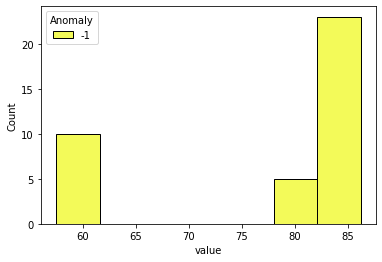

In [405]:
#Displaying the histogram values includes anomalies
sns.set_palette("Paired")
sns.histplot(anomaly, x="value",hue="Anomaly", multiple="stack",palette='plasma_r')

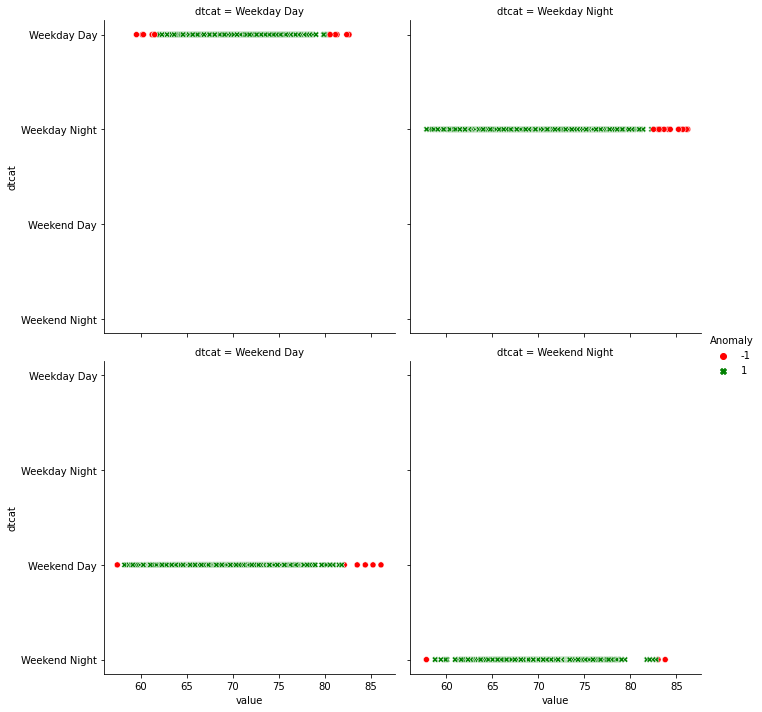

In [406]:
#Displaying the 4 categories using scatter plot including the anomalies
sns.relplot(data=IF2,x='value',y='dtcat',hue="Anomaly",col="dtcat",col_wrap=2,style="Anomaly",kind="scatter",palette=['Red','Green'])

<AxesSubplot:xlabel='value', ylabel='Count'>

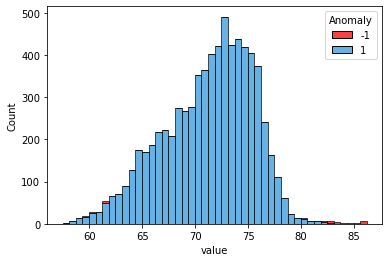

In [407]:
#plotting the histogram with the concatinated dataset
sns.set_palette("Paired")
sns.histplot(IF2, x="value",hue="Anomaly", multiple="stack",palette=['Red','#3498db'])

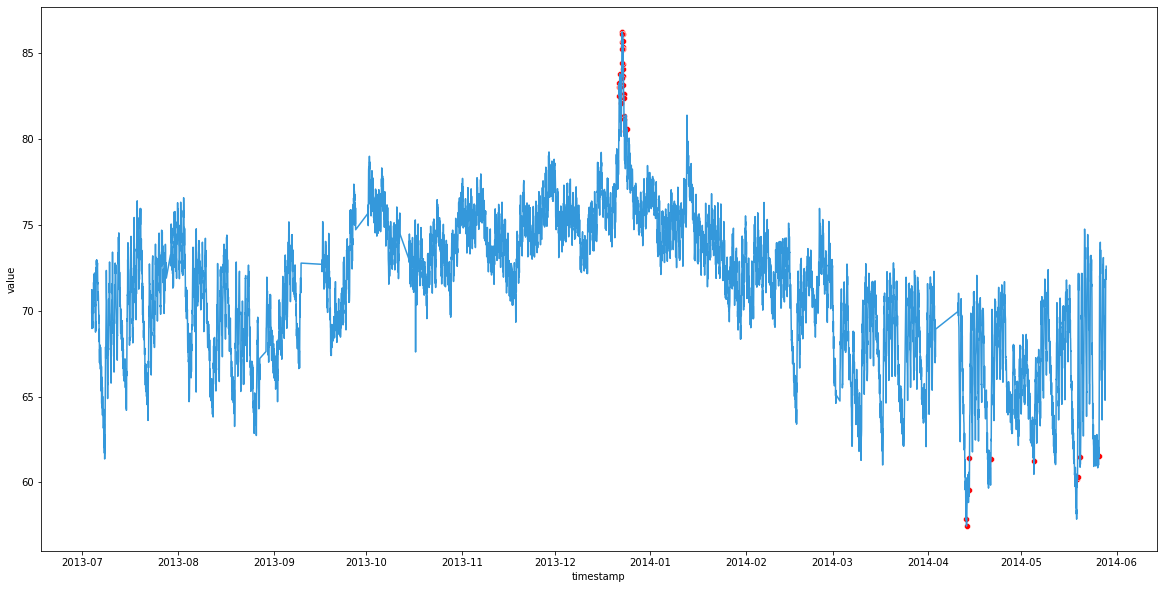

In [408]:
#Plotting the timeseries graph along with the anamolies 
fig=plt.figure(figsize=(20,10))
sns.lineplot(data=IF2,x='timestamp',y='value',color='#3498db')
sns.scatterplot(data=IF2[IF2['Anomaly']==-1],x='timestamp',y='value',color='red')
plt.show()

## 7) Which of the two (2) models performs better on detecting anomalies?


###### I think Isolation forest algorithm performs better when comapred to Guassian distribution elliptic enevelope by observing the results in anomalies.As the number of anomalies were widely distributed in Isolationolation Forest.When compared Isolation forest performs faster processing with respect to  Guassian distribution